In [75]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
digits=load_digits()
digits.keys()
print(digits['DESCR'])

0


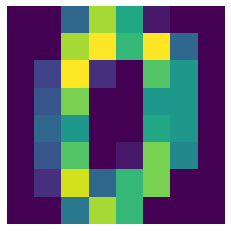

In [12]:
plt.imshow(np.reshape(digits['data'][0,:],(8,8)))
plt.axis('off')
print(digits['target'][0])

In [21]:
class MLP(nn.Module):
  def __init__(self,input_size=64,output_size=10,layers=[30,30]):
    super().__init__()
    self.fc1=nn.Linear(input_size,layers[0])####input layer 1
    self.fc2=nn.Linear(layers[0],layers[1])###hidden layer
    self.fc3=nn.Linear(layers[1],output_size)###output layer

  def forward(self,X):
    X=F.relu(self.fc1(X))###usingActivation Fun On Input
    X=F.relu(self.fc2(X))
    X=F.log_softmax(self.fc3(X),dim=1)###dim=1 means I want to use softmax in relation with columns
    return X


In [22]:
model= MLP()
print(model)

MLP(
  (fc1): Linear(in_features=64, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
)


In [45]:
criteria=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001,betas=[0.9,0.999])

In [38]:
X_Train,X_Test,Y_Train,Y_Test= train_test_split(digits['data'],digits['target'],test_size=0.2)

In [39]:
X_Train.shape , Y_Train.shape 

((1437, 64), (1437,))

In [40]:
X_Test.shape ,Y_Test.shape

((360, 64), (360,))

In [41]:
X_Train=torch.from_numpy(X_Train)
X_Train=X_Train.to(torch.float32)
X_Test=torch.from_numpy(X_Test)
X_Test=X_Test.to(torch.float32)

Y_Train=torch.from_numpy(Y_Train)
Y_Test=torch.from_numpy(Y_Test)

In [95]:
for epoch in range(100):
  output = model(X_Train)
  loss=criteria(output,Y_Train)
  pred=torch.max(output.data,dim=1)[1]
  acc_Train=accuracy_score(y_true=Y_Train,y_pred=pred)
  optimizer.zero_grad()###for forgetting the previous gradient
  loss.backward()
  optimizer.step()### for doing one step of optimization

  print('epoch:{}, Loss:{} ,Acc_Train:'.format(epoch, np.round(loss.item(),3)), acc_Train)
  

epoch:0, Loss:0.032 ,Acc_Train: 0.9965205288796103
epoch:1, Loss:0.031 ,Acc_Train: 0.9965205288796103
epoch:2, Loss:0.031 ,Acc_Train: 0.9965205288796103
epoch:3, Loss:0.031 ,Acc_Train: 0.9965205288796103
epoch:4, Loss:0.03 ,Acc_Train: 0.9965205288796103
epoch:5, Loss:0.03 ,Acc_Train: 0.9965205288796103
epoch:6, Loss:0.03 ,Acc_Train: 0.9965205288796103
epoch:7, Loss:0.029 ,Acc_Train: 0.9965205288796103
epoch:8, Loss:0.029 ,Acc_Train: 0.9965205288796103
epoch:9, Loss:0.029 ,Acc_Train: 0.9965205288796103
epoch:10, Loss:0.028 ,Acc_Train: 0.9965205288796103
epoch:11, Loss:0.028 ,Acc_Train: 0.9965205288796103
epoch:12, Loss:0.028 ,Acc_Train: 0.9965205288796103
epoch:13, Loss:0.028 ,Acc_Train: 0.9965205288796103
epoch:14, Loss:0.027 ,Acc_Train: 0.9965205288796103
epoch:15, Loss:0.027 ,Acc_Train: 0.9965205288796103
epoch:16, Loss:0.027 ,Acc_Train: 0.9965205288796103
epoch:17, Loss:0.026 ,Acc_Train: 0.9965205288796103
epoch:18, Loss:0.026 ,Acc_Train: 0.9965205288796103
epoch:19, Loss:0.026 ,Acc

In [96]:
###findingThePerformanceOf Model
out=model(X_Test)
Y_pred=torch.max(out.data,dim=1)[1]
print(accuracy_score(y_true=Y_Test,y_pred=Y_pred))

0.9666666666666667
